In [ ]:
import os
! git clone https://github.com/olafbar/classifiers.git
! pip install mahotas


Cloning into 'classifiers'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
     |████████████████████████████████| 5.7MB 25.0MB/s 


In [ ]:
import tensorflow as tf

print(tf.keras.__version__)

2.5.0


In [ ]:
import os
#########################################################################  
dir='15'  # nazwa katalogu z obrazkami
classifier='CNN_small_raw'  #nazwa klasyfikatora
falki=('raw',)
# falki=(0,)  #odpowiedni zbiór falek
# falki=(2,)
# falki=(20,)
# falki=(2,4,6,8,10,12,14,16,18,20,)  # dla w_2_20
## CNN_small_w0,CNN_small_w2,CNN_small_w20,CNN_small_w2_20,CNN_small_raw,CNN_big_raw
#########################################################################
url='https://user.credo.science/user-interface/download/images/download.php?name='+dir+'.zip -O '+dir+'.zip'
print(url)
os.system('wget %s' %url)
par=dir+' -d '+dir
os.system('unzip %s' %par)



https://user.credo.science/user-interface/download/images/download.php?name=15.zip -O 15.zip


0

In [ ]:
import cv2
import glob
images=[]
list_images_name=[]
for img in glob.glob(dir+"/*.png"):
    n = cv2.imread(img)
    img = img.split('/')
    list_images_name.append(img[1])
    images.append(n)

In [ ]:
def preprocessData(data, wavelets=(2,), verbose=True):

  import mahotas
  import numpy as np

  print(wavelets)

  images = data

  features = []
  bl_images = []
  th_images = []

  for img in images:

    img = img.astype('int32')

    blackwhite=img[:,:,0]+img[:,:,1]+img[:,:,2]
    bl_images.append(blackwhite.copy())

    threshold = blackwhite.mean() + blackwhite.std() * 5
    threshold = threshold if threshold < 100 else 100  

    mask = np.where(blackwhite > threshold, 1, 0)
    blackwhite = blackwhite * mask

    th_images.append(blackwhite.copy())


    # Transform using Dx Wavelets to obtain transformed images

    layers = {
      'raw':img.reshape(60,60,3),  
      0: blackwhite.reshape(60,60,1),
      2: mahotas.daubechies(blackwhite,'D2').reshape(60,60,1),
      4: mahotas.daubechies(blackwhite,'D4').reshape(60,60,1),
      6: mahotas.daubechies(blackwhite,'D6').reshape(60,60,1),
      8: mahotas.daubechies(blackwhite,'D8').reshape(60,60,1),
      10: mahotas.daubechies(blackwhite,'D10').reshape(60,60,1),
      12: mahotas.daubechies(blackwhite,'D12').reshape(60,60,1),
      14: mahotas.daubechies(blackwhite,'D14').reshape(60,60,1),
      16: mahotas.daubechies(blackwhite,'D16').reshape(60,60,1),
      18: mahotas.daubechies(blackwhite,'D18').reshape(60,60,1),
      20: mahotas.daubechies(blackwhite,'D20').reshape(60,60,1)
    }

    # tt = np.concatenate((t02, t04, t06, t08), axis=2)
    out = np.concatenate(tuple(map(layers.__getitem__, wavelets)), axis=2)

    features.append(out)

  feature_array = np.array(features)

  if verbose:
    print(feature_array.shape)
   

  return (feature_array)


In [ ]:
feature_array = preprocessData(data=(images), wavelets=falki)


('raw',)
(40000, 60, 60, 3)


In [ ]:
from keras.models import load_model
model = load_model('classifiers/'+classifier+'.h5')


In [ ]:
import numpy as np
y_pred2 = np.argmax(model.predict(feature_array),axis=1)


In [ ]:
for i in range(2):
    count = sum(map(lambda x : x==i, y_pred2))
    print(i,count)

0 37858
1 2142


In [ ]:
classifiers=[classifier for x in range(len(y_pred2))]
import pandas as pd
df = pd.DataFrame({
    'Classifier': classifiers,
    'Hit ID': list_images_name,
    'Class': y_pred2
})

In [ ]:
df.to_csv(classifier+'_'+dir+'.csv', index=False)

In [ ]:
print(df.loc[df['Class'] == 0])

          Classifier        Hit ID  Class
0      CNN_small_raw   8865764.png      0
1      CNN_small_raw   9831150.png      0
2      CNN_small_raw  13093513.png      0
3      CNN_small_raw  10864746.png      0
4      CNN_small_raw  11796285.png      0
...              ...           ...    ...
39994  CNN_small_raw  16458186.png      0
39996  CNN_small_raw   6739339.png      0
39997  CNN_small_raw  10232298.png      0
39998  CNN_small_raw   9800563.png      0
39999  CNN_small_raw  13075167.png      0

[37858 rows x 3 columns]


In [ ]:
list_images_name[39998]

'9800563.png'

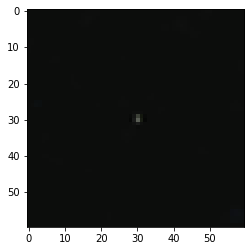

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(images[39998])